In [166]:
from pymongo import MongoClient
import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import json
import time

In [162]:
client = MongoClient('localhost', 27017)

In [163]:
db = client['book']
book_detail = db['book_detail']

In [252]:
book_detail.estimated_document_count()

1902

In [253]:
df = pd.DataFrame(book_detail.find({},{'_id':False}))

In [254]:
print(len(df))
df = df.drop_duplicates(subset=['book_title'])
print(len(df))

1902
1902


In [255]:
df.head()

,book_title,author_name,avg_rating,rating_count,review_count,format,number_of_page,language,ISBN
0,Computer Science: An Overview,J. Glenn Brookshear,3.76,310,22,Paperback,599.0,English,ISBN0321387015(ISBN13:9780321387011)
1,Multiple Choice Questions in Computer Science,Ela Kumar,3.62,66,9,Paperback,472.0,None,ISBN819067577X(ISBN13:9788190675772)
2,Cambridge International as and a Level Compute...,Tony Piper,4.29,41,4,Paperback,328.0,None,ISBN1107547547(ISBN13:9781107547544)
3,"Algorithms on Strings, Trees and Sequences: Co...",Dan Gusfield,4.09,85,4,Hardcover,556.0,English,ISBN0521585198(ISBN13:9780521585194)
4,Coding the Matrix: Linear Algebra through Comp...,Philip N. Klein,4.23,115,5,Paperback,528.0,English,ISBN061585673X(ISBN13:9780615856735)


In [256]:
df.shape

(1902, 9)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_title      1902 non-null   object 
 1   author_name     1902 non-null   object 
 2   avg_rating      1902 non-null   float64
 3   rating_count    1902 non-null   int64  
 4   review_count    1902 non-null   int64  
 5   format          1852 non-null   object 
 6   number_of_page  1573 non-null   float64
 7   language        956 non-null    object 
 8   ISBN            1902 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 148.6+ KB


In [258]:
df.describe()

,avg_rating,rating_count,review_count,number_of_page
count,1902.000000,1902.000000,1902.000000,1573.000000
mean,2.109311,10.786015,1.182440,387.778767
std,2.017028,61.096563,9.845778,305.735283
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,189.000000
50%,2.790000,1.000000,0.000000,332.000000
75%,4.000000,3.000000,0.000000,512.000000
max,5.000000,965.000000,218.000000,3348.000000


In [259]:
df.apply(lambda x: sum(x.isnull()),axis=0)

book_title          0
author_name         0
avg_rating          0
rating_count        0
review_count        0
format             50
number_of_page    329
language          946
ISBN                0
dtype: int64

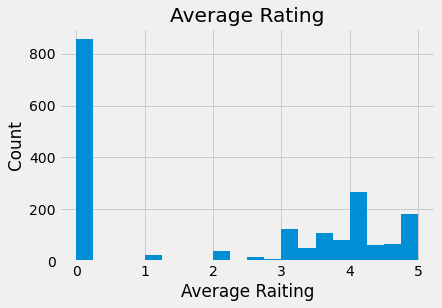

In [260]:
fig, ax = plt.subplots()
ax.hist(df['avg_rating'], bins=20);
plt.title("Average Rating")
plt.xlabel('Average Raiting')
plt.ylabel('Count');

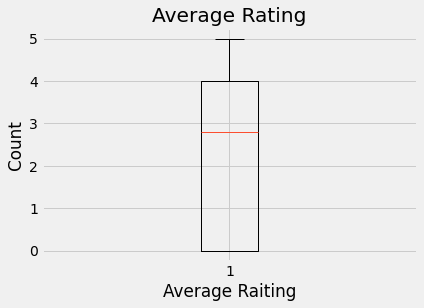

In [261]:
fig, ax = plt.subplots()
ax.boxplot(df['avg_rating']);
plt.title("Average Rating")
plt.xlabel('Average Raiting')
plt.ylabel('Count');

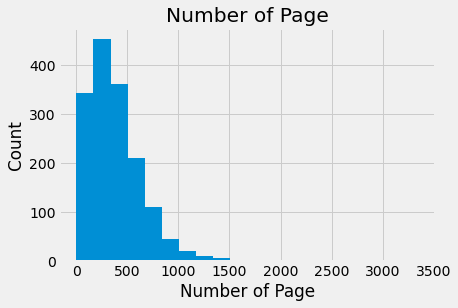

In [262]:
fig, ax = plt.subplots()
ax.hist(df['number_of_page'].dropna(), bins=20);
plt.title("Number of Page")
plt.xlabel('Number of Page')
plt.ylabel('Count');

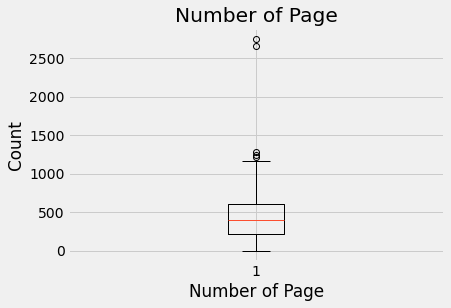

In [207]:
fig, ax = plt.subplots()
ax.boxplot(df['number_of_page'].dropna());
plt.title("Number of Page")
plt.xlabel('Number of Page')
plt.ylabel('Count');

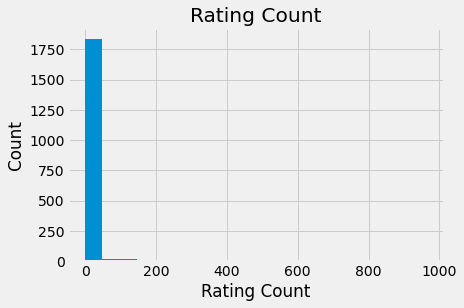

In [263]:
fig, ax = plt.subplots()
ax.hist(df['rating_count'], bins=20);
plt.title("Rating Count")
plt.xlabel('Rating Count')
plt.ylabel('Count');

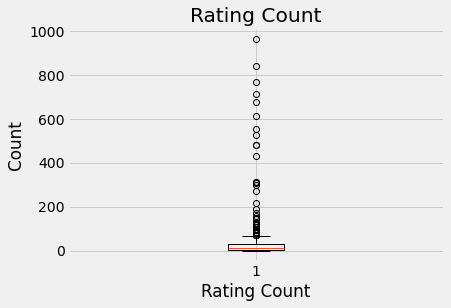

In [209]:
fig, ax = plt.subplots()
ax.boxplot(df['rating_count']);
plt.title("Rating Count")
plt.xlabel('Rating Count')
plt.ylabel('Count');

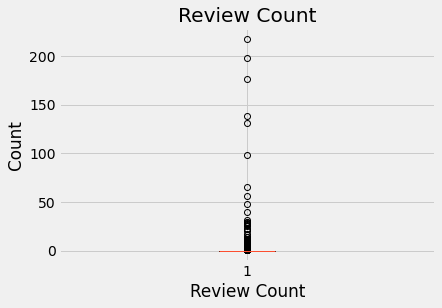

In [264]:
fig, ax = plt.subplots()
ax.boxplot(df['review_count']);
plt.title("Review Count")
plt.xlabel('Review Count')
plt.ylabel('Count');

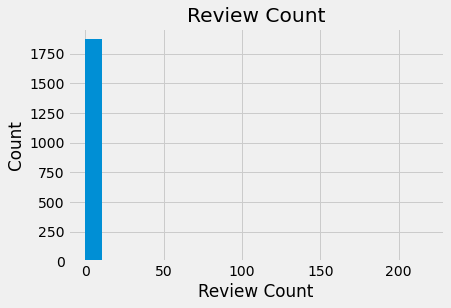

In [265]:
fig, ax = plt.subplots()
ax.hist(df['review_count'], bins=20);
plt.title("Review Count")
plt.xlabel('Review Count')
plt.ylabel('Count');

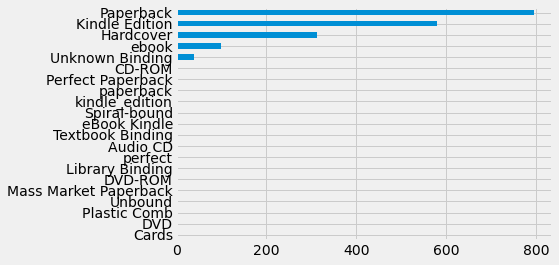

In [266]:
df['format'].value_counts().sort_values(ascending=True).plot(kind='barh');

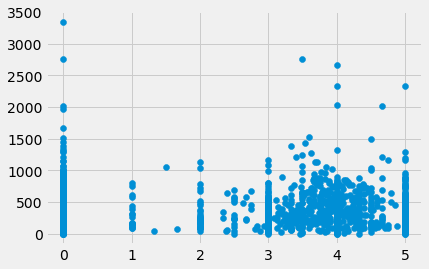

In [267]:
fig, ax = plt.subplots()
ax.scatter(df['avg_rating'],df['number_of_page']);

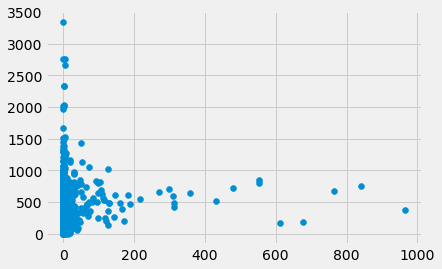

In [268]:
fig, ax = plt.subplots()
ax.scatter(df['rating_count'],df['number_of_page']);

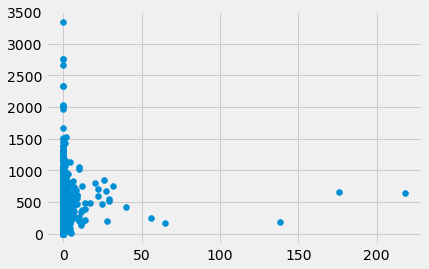

In [269]:
fig, ax = plt.subplots()
ax.scatter(df['review_count'],df['number_of_page']);

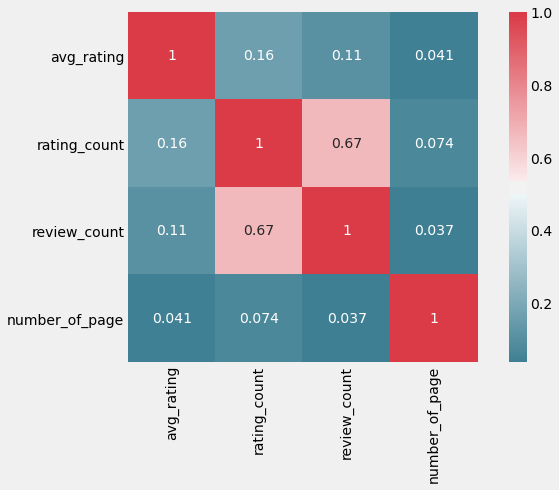

In [270]:
fig, ax = plt.subplots(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

In [272]:
db = client['book']
book_info = db['book_info']
df_link = pd.DataFrame(book_info.find({},{'_id':False}))

In [275]:
print(len(df_link))
df_link = df_link.drop_duplicates(subset=['book_title'])
print(len(df_link))

2040
1896


In [277]:
df_link.head()

,book_title,author_name,avg_rating,rating_count,publish year,edition,link
0,Computer Science: An Overview,J. Glenn Brookshear,3.76 avg rating,310 ratings,published 1985,35 editions,https://www.goodreads.com/book/show/533070.Com...
1,Multiple Choice Questions in Computer Science,Ela Kumar,3.62 avg rating,66 ratings,published 2008,1 edition,https://www.goodreads.com/book/show/8266079-mu...
2,Cambridge International as and a Level Compute...,Tony Piper,4.29 avg rating,41 ratings,None,1 edition,https://www.goodreads.com/book/show/28131102-c...
3,"Algorithms on Strings, Trees and Sequences: Co...",Dan Gusfield,4.09 avg rating,85 ratings,published 1997,4 editions,https://www.goodreads.com/book/show/145058.Alg...
4,Coding the Matrix: Linear Algebra through Comp...,Philip N. Klein,4.23 avg rating,115 ratings,published 2013,2 editions,https://www.goodreads.com/book/show/18245828-c...


In [278]:
total_df = pd.merge(df, df_link, on=['book_title'])

In [280]:
total_df.head()

,book_title,author_name_x,avg_rating_x,rating_count_x,review_count,format,number_of_page,language,ISBN,author_name_y,avg_rating_y,rating_count_y,publish year,edition,link
0,Computer Science: An Overview,J. Glenn Brookshear,3.76,310,22,Paperback,599.0,English,ISBN0321387015(ISBN13:9780321387011),J. Glenn Brookshear,3.76 avg rating,310 ratings,published 1985,35 editions,https://www.goodreads.com/book/show/533070.Com...
1,Multiple Choice Questions in Computer Science,Ela Kumar,3.62,66,9,Paperback,472.0,None,ISBN819067577X(ISBN13:9788190675772),Ela Kumar,3.62 avg rating,66 ratings,published 2008,1 edition,https://www.goodreads.com/book/show/8266079-mu...
2,Cambridge International as and a Level Compute...,Tony Piper,4.29,41,4,Paperback,328.0,None,ISBN1107547547(ISBN13:9781107547544),Tony Piper,4.29 avg rating,41 ratings,None,1 edition,https://www.goodreads.com/book/show/28131102-c...
3,"Algorithms on Strings, Trees and Sequences: Co...",Dan Gusfield,4.09,85,4,Hardcover,556.0,English,ISBN0521585198(ISBN13:9780521585194),Dan Gusfield,4.09 avg rating,85 ratings,published 1997,4 editions,https://www.goodreads.com/book/show/145058.Alg...
4,Coding the Matrix: Linear Algebra through Comp...,Philip N. Klein,4.23,115,5,Paperback,528.0,English,ISBN061585673X(ISBN13:9780615856735),Philip N. Klein,4.23 avg rating,115 ratings,published 2013,2 editions,https://www.goodreads.com/book/show/18245828-c...


In [282]:
total_df.to_csv('total_df.csv', index = False)